# **Séries Temporais**

# **Testando estacionariedade de uma série estacionária simulada**

In [1]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Simulando a série**

In [2]:
# Definindo uma semente
np.random.seed(2018)

# Simulando valores da série
dados = pd.DataFrame(data = np.random.normal(0,1,27), columns=['valores'])

# Espiando o resultado
dados.head()

,valores
0,-0.276768
1,0.581851
2,2.148399
3,-1.279487
4,0.502277


In [3]:
# Criando o índice
indice = pd.date_range(
    start='1995', 
    periods = len(dados), 
    freq = 'Y'
)

# Espiando os índices gerados
indice

DatetimeIndex(['1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [4]:
# Criando a  Serie temporal
serie_simulada = pd.Series(
    data = dados['valores'].values, 
    index = indice
)

# Espiando o resultado
serie_simulada

1995-12-31   -0.276768
1996-12-31    0.581851
1997-12-31    2.148399
1998-12-31   -1.279487
1999-12-31    0.502277
2000-12-31    0.856029
2001-12-31   -0.142790
2002-12-31    0.110079
2003-12-31   -0.688065
2004-12-31    0.433564
2005-12-31    0.510221
2006-12-31   -0.165131
2007-12-31   -1.351779
2008-12-31    0.546631
2009-12-31    1.230655
2010-12-31    1.076446
2011-12-31   -1.210625
2012-12-31   -0.306677
2013-12-31   -1.057419
2014-12-31    0.402057
2015-12-31    0.289165
2016-12-31    1.282733
2017-12-31   -1.065696
2018-12-31   -1.706633
2019-12-31   -0.172797
2020-12-31    0.063710
2021-12-31    0.370628
Freq: A-DEC, dtype: float64

### **Análise descritiva da Série**

In [5]:
# Gerando algumas estatísticas desta série
serie_simulada.describe()

count    27.000000
mean      0.036318
std       0.923752
min      -1.706633
25%      -0.497371
50%       0.110079
75%       0.528426
max       2.148399
dtype: float64

### **Visualização da Série**

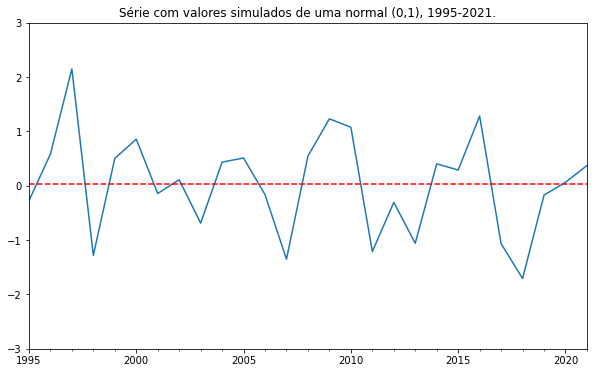

In [6]:
# Gerando o gráfico
serie_simulada.plot(
    title = 'Série com valores simulados de uma normal (0,1), 1995-2021.',
    figsize =(10, 6)
)

# Inserindo uma linha horizontal com a média dos dados
plt.axhline (y=serie_simulada.mean(), color = 'red', linestyle = '--')

# Definindo intervalo do eixo
plt.ylim((-3,3))

# Exibindo o gráfico
plt.show()

### **Teste de estacionaridade - (Dickey Fuller)**

- **Hipótese nula (Ho):** a série *não é estacionária*
- **Hipótese Alternativa (Ha):** a série *é estacionária*

In [7]:
# Importando biblioteca necessária
import statsmodels.tsa.stattools

In [8]:
# Calculando as medidas do teste Dickey Fuller
df = statsmodels.tsa.stattools.adfuller(serie_simulada)

print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p-valor do teste: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -5.0356
p-valor do teste: 0.00001886
Valores Críticos:
1%: -3.7377
5%: -2.9922
10%: -2.6357


Como a estatística do teste é menor que o valor crítico podemos considerar que existem evidências suficientes para rejeitar a hipótese nula, ou seja, existem evidências, a nível de 1% de significância de que a série é estacionária.

# **Testando estacionariedade da Série de óbitos por covid-19 no Brasil de mar/2021 a mar/2022**

### **Carregando o conjunto de dados**

In [9]:
# Importando o conjunto de dados
file = ''
covid = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/covid19_brasil/cases-brazil-states.csv', 
    sep=',',
    decimal='.'
)

In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5596 entries, 0 to 5595
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          5596 non-null   object 
 1   state                            5596 non-null   object 
 2   city                             5596 non-null   object 
 3   ibgeID                           5596 non-null   int64  
 4   deaths                           5596 non-null   int64  
 5   totalCases                       5596 non-null   int64  
 6   deaths_per_100k_inhabitants      5596 non-null   float64
 7   totalCases_per_100k_inhabitants  5596 non-null   float64
 8   deaths_by_totalCases             5596 non-null   float64
 9   _source                          5596 non-null   object 
 10  date                             5596 non-null   object 
 11  newCases                         5596 non-null   int64  
 12  newDeaths           

### **Transformando o conjunto de dados**

In [11]:
# Transformando o atributo 'data' em datetime
covid['date'] = pd.to_datetime(covid['date'], infer_datetime_format=True)

In [12]:
# Espiando o conjunto de dados
covid.head()

,country,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths,last_info_date
0,Brazil,GO,Abadia de Goiás/GO,5200050,48,3679,524.13191,40172.52675,0.01305,MS,2022-08-11,0,0,2022-08-11
1,Brazil,MG,Abadia dos Dourados/MG,3100104,20,1801,284.81914,25647.96354,0.01110,MS,2022-08-11,0,0,2022-08-11
2,Brazil,GO,Abadiânia/GO,5200100,55,1911,263.49830,9155.36818,0.02878,MS,2022-08-11,0,0,2022-08-11
3,Brazil,PA,Abaetetuba/PA,1500107,239,10749,148.96627,6699.74258,0.02223,MS,2022-08-11,0,0,2022-08-11
4,Brazil,MG,Abaeté/MG,3100203,50,3858,214.93359,16584.27546,0.01296,MS,2022-08-11,0,0,2022-08-11


In [13]:
# Calculando a população baseado
covid['population'] = covid['totalCases'] \
                  .div(covid['totalCases_per_100k_inhabitants'])\
                  .mul(100000)

In [14]:
# Calculando a taxa de mortalidade
covid['newDeaths_per_100k_inhabitants'] = covid['newDeaths']\
  .div(covid['population'])\
  .mul(100000)

In [15]:
# Filtrando somente os resultado para TOTAL do Brasil
covid_BR = covid.query('state=="TOTAL"')

In [16]:
covid_BR[['date','newDeaths_per_100k_inhabitants']].head()

,date,newDeaths_per_100k_inhabitants


In [17]:
# Criando a  Serie temporal
serie_obitos_covid_BR = pd.Series(
    data = covid_BR['newDeaths_per_100k_inhabitants'].values, 
    index = covid_BR['date'].values
)

# Espiando o resultado
serie_obitos_covid_BR

Series([], dtype: float64)

### **Visualização da Série**

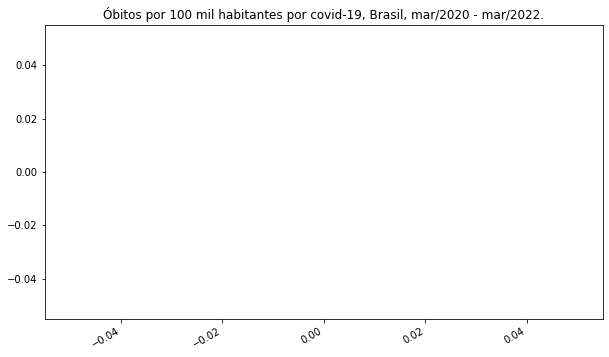

In [18]:
# Gerando o gráfico
serie_obitos_covid_BR.plot(
    title = 'Óbitos por 100 mil habitantes por covid-19, Brasil, mar/2020 - mar/2022.',
    figsize =(10, 6)
)

# Exibindo o gráfico
plt.show()

### **Teste de estacionaridade - (Dickey Fuller)**

- **Hipótese nula (Ho):** a série *não é estacionária*
- **Hipótese Alternativa (Ha):** a série *é estacionária*

In [69]:
# Importando biblioteca necessária
import statsmodels.tsa.stattools

In [70]:
# Calculando as medidas do teste Dickey Fuller
df = statsmodels.tsa.stattools.adfuller(serie_obitos_covid_BR)

print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p-valor do teste: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -1.9175
p-valor do teste: 0.32387512
Valores Críticos:
1%: -3.4392
5%: -2.8654
10%: -2.5688


Como a estatística do teste é maior que o valor crítico podemos considerar que NÃO existem evidências suficientes para rejeitar a hipótese nula, ou seja, a nível de 1% de significância NÃO existe evidências de que a série é estacionária.

# **Testando estacionariedade da Série de óbitos por covid-19 na Bahia de dez/2020 a jan/2021**

### **Transformando o conjunto de dados**

In [80]:
# Filtrando somente os resultado para Bahia
covid_BA = covid.query('state=="BA"')

In [81]:
# Espiando a Serie da Bahia
covid_BA[['date','newDeaths_per_100k_inhabitants']].head()

,date,newDeaths_per_100k_inhabitants
21,2020-03-06,0.0
26,2020-03-07,0.0
33,2020-03-08,0.0
41,2020-03-09,0.0
49,2020-03-10,0.0


In [82]:
# Criando a  Serie temporal
serie_covid_BA = pd.Series(
    data = covid_BA['newDeaths_per_100k_inhabitants'].values, 
    index = covid_BA['date'].values
)

# Espiando o resultado
serie_covid_BA

2020-03-06    0.000000
2020-03-07    0.000000
2020-03-08    0.000000
2020-03-09    0.000000
2020-03-10    0.000000
                ...   
2022-03-27    0.006724
2022-03-28    0.094130
2022-03-29    0.107577
2022-03-30    0.080683
2022-03-31    0.087406
Length: 756, dtype: float64

### **Visualizando a Série**

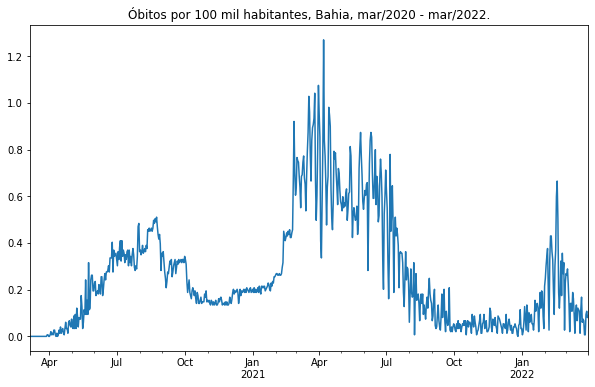

In [83]:
# Gerando o gráfico
serie_covid_BA.plot(
    title = 'Óbitos por 100 mil habitantes, Bahia, mar/2020 - mar/2022.',
    figsize =(10, 6)
)

# Exibindo o gráfico
plt.show()

### **Selecionando somente o período de set a dez de 2021**

In [84]:
# Filtrando somente os resultado para Bahia entre out e nov de 2021
covid_BA_dez20_jan21 = covid_BA\
                        .query('date>"2020-12-15"')\
                        .query('date<"2021-01-15"')

In [85]:
# Criando a  Serie temporal
serie_covid_BA_dez20_jan21 = pd.Series(
    data = covid_BA_dez20_jan21['newDeaths_per_100k_inhabitants'].values, 
    index = covid_BA_dez20_jan21['date'].values
)

# Espiando o resultado
serie_covid_BA_dez20_jan21

2020-12-16    0.174813
2020-12-17    0.194983
2020-12-18    0.188260
2020-12-19    0.194983
2020-12-20    0.201707
2020-12-21    0.188260
2020-12-22    0.201707
2020-12-23    0.188260
2020-12-24    0.208430
2020-12-25    0.201707
2020-12-26    0.194983
2020-12-27    0.188260
2020-12-28    0.201707
2020-12-29    0.208430
2020-12-30    0.188260
2020-12-31    0.194983
2021-01-01    0.201707
2021-01-02    0.188260
2021-01-03    0.208430
2021-01-04    0.188260
2021-01-05    0.201707
2021-01-06    0.188260
2021-01-07    0.194983
2021-01-08    0.208430
2021-01-09    0.188260
2021-01-10    0.215154
2021-01-11    0.194983
2021-01-12    0.181536
2021-01-13    0.215154
2021-01-14    0.208430
dtype: float64

### **Visualizando a nova Série de out a nov de 2021**

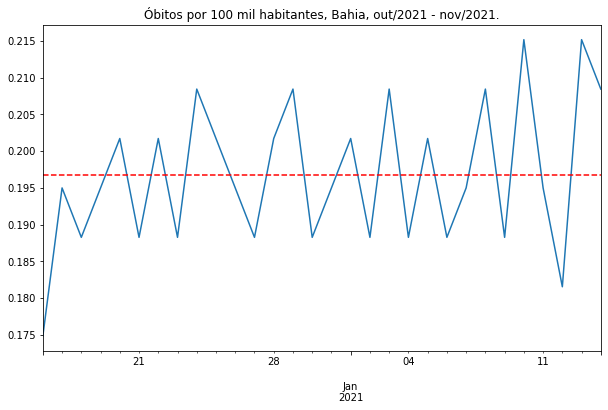

In [86]:
# Gerando o gráfico
serie_covid_BA_dez20_jan21.plot(
    title = 'Óbitos por 100 mil habitantes, Bahia, out/2021 - nov/2021.',
    figsize =(10, 6)
)

# Inserindo uma linha horizontal com a média dos dados
plt.axhline(
    y=serie_covid_BA_dez20_jan21.mean(), 
    color = 'red', 
    linestyle = '--'
)

# Exibindo o gráfico
plt.show()

### **Teste de estacionaridade - (Dickey Fuller)**

- **Hipótese nula (Ho):** a série *não é estacionária*
- **Hipótese Alternativa (Ha):** a série *é estacionária*

In [87]:
# Calculando as medidas do teste Dickey Fuller
df = statsmodels.tsa.stattools.adfuller(serie_covid_BA_dez20_jan21)

print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p-valor do teste: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -5.0230
p-valor do teste: 0.00001998
Valores Críticos:
1%: -3.6889
5%: -2.9720
10%: -2.6253


Como a estatística do teste é menor que o valor crítico podemos considerar que existem evidências suficientes para rejeitar a hipótese nula, ou seja, existem evidências, a nível de 1% de significância de que a série é estacionária.